In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = './development/data/'
train_df = pd.read_csv(data_dir + 'train.csv')
demographics_df = pd.read_csv(data_dir + 'train_demographics.csv')

full_df = pd.merge(train_df, demographics_df, on='subject', how='left')

In [3]:
# 样本数量
train_df['sequence_id'].nunique()

8151

NaN值占比: 1.91%
-1值占比: 57.49%

正在生成有效ToF数据值的分布直方图...
生成图片中...


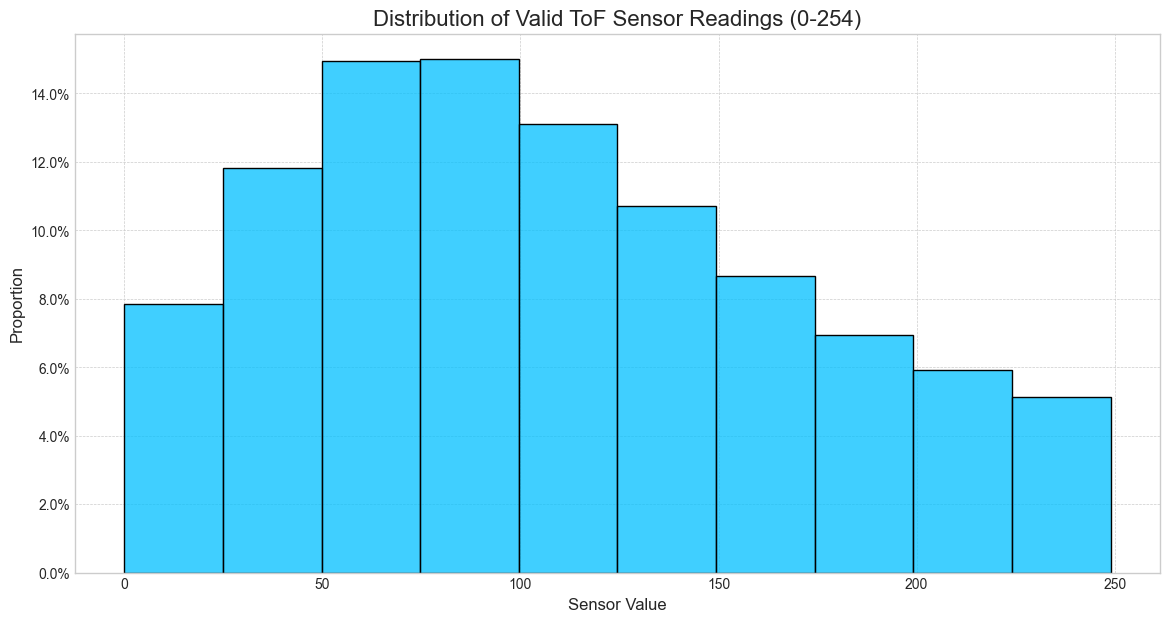

In [4]:
# TOF数据分析
tof_cols = [col for col in train_df.columns if col.startswith('tof_')]

# 提取所有ToF数据并计算统计量
tof_data = train_df[tof_cols]
total_tof_values = tof_data.size

# 计算 NaN 的数量和比例
nan_count = tof_data.isnull().sum().sum()
nan_proportion = nan_count / total_tof_values

# 计算 -1 的数量和比例
minus_one_count = (tof_data == -1).sum().sum()
minus_one_proportion = minus_one_count / total_tof_values

# 打印分析结果
print(f"NaN值占比: {nan_proportion:.2%}")
print(f"-1值占比: {minus_one_proportion:.2%}")

# 5. 分析并可视化有效值的分布
print("\n正在生成有效ToF数据值的分布直方图...")

# 将所有ToF数据展平成一维数组
flat_tof_values = tof_data.values.flatten()

# 过滤掉NaN和-1，得到纯净的有效读数
valid_tof_values = flat_tof_values[~np.isnan(flat_tof_values) & (flat_tof_values != -1)]

print("生成图片中...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))

sns.histplot(x=valid_tof_values, bins=10, kde=False, color='deepskyblue', stat='probability')

plt.title('Distribution of Valid ToF Sensor Readings (0-254)', fontsize=16)
plt.xlabel('Sensor Value', fontsize=12)
plt.ylabel('Proportion', fontsize=12) 

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

序列长度分布：
count    8151.000000
mean       70.536744
std        35.389879
min        29.000000
10%        48.000000
25%        51.000000
50%        59.000000
75%        78.000000
90%       103.000000
95%       127.000000
99%       210.000000
max       700.000000
dtype: float64
生成图片中...


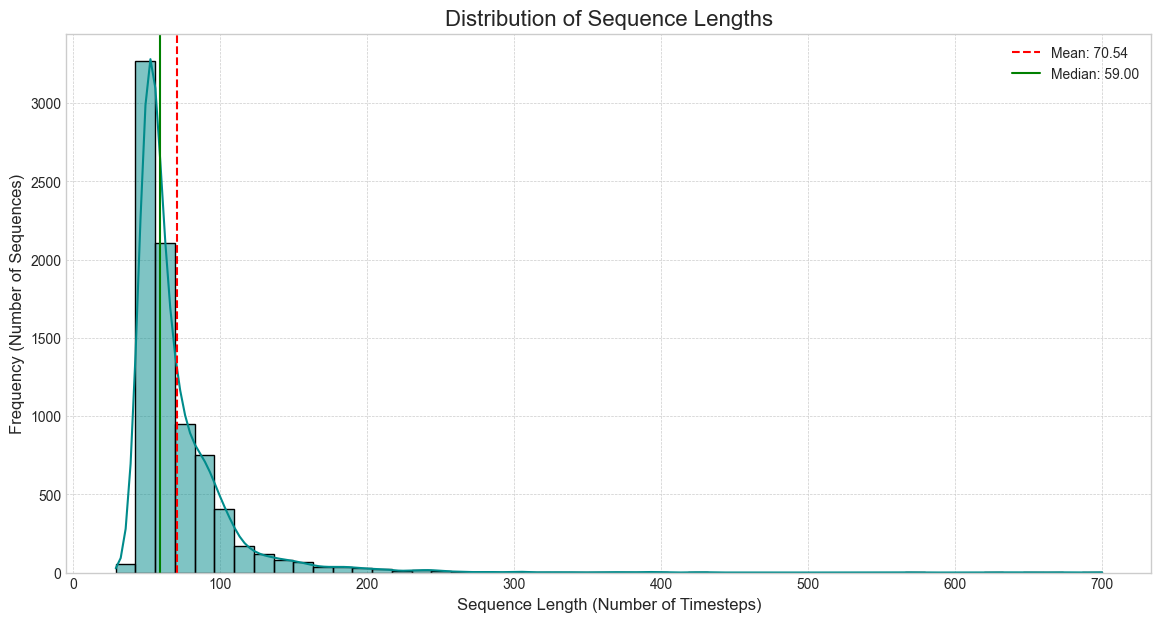

: 

: 

: 

In [ ]:
# 序列长度的分布
sequence_lengths = train_df.groupby('sequence_id').size()

# 3. 显示描述性统计信息
print("序列长度分布：")
print(sequence_lengths.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# 4. 可视化分布
print("生成图片中...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))

# 使用 a histogram 和 a KDE (Kernel Density Estimate) plot 来观察分布
sns.histplot(sequence_lengths, kde=True, bins=50, color='darkcyan')

plt.title('Distribution of Sequence Lengths', fontsize=16)
plt.xlabel('Sequence Length (Number of Timesteps)', fontsize=12)
plt.ylabel('Frequency (Number of Sequences)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 可以在图上额外标记出均值和中位数的位置
plt.axvline(sequence_lengths.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {sequence_lengths.mean():.2f}')
plt.axvline(sequence_lengths.median(), color='green', linestyle='-', linewidth=1.5, label=f'Median: {sequence_lengths.median():.2f}')
plt.legend()

In [ ]:
missing_percentages = full_df.isnull().sum() / len(full_df) * 100

# 3. 筛选出有缺失值的列，并按降序排序
columns_with_missing_data = missing_percentages[missing_percentages > 0]

# 4. 打印结果
print("--- NaN Missing Data Report ---")
if columns_with_missing_data.empty:
    print("Congratulations! No missing NaN values found in the dataset.")
else:
    print("Percentage of NaN values per column (only showing columns with missing data):\n")
    # 为了更好的可读性，我们可以将Series转换为DataFrame进行打印
    missing_info_df = pd.DataFrame({
        'Column': columns_with_missing_data.index,
        'Missing_Percentage': columns_with_missing_data.values
    })
    print(missing_info_df.to_string(index=False))

--- NaN Missing Data Report ---
Percentage of NaN values per column (only showing columns with missing data):

   Column  Missing_Percentage
    rot_w            0.642148
    rot_x            0.642148
    rot_y            0.642148
    rot_z            0.642148
    thm_1            1.215247
    thm_2            1.328475
    thm_3            1.125673
    thm_4            1.082538
    thm_5            5.789423
 tof_1_v0            1.082538
 tof_1_v1            1.082538
 tof_1_v2            1.082538
 tof_1_v3            1.082538
 tof_1_v4            1.082538
 tof_1_v5            1.082538
 tof_1_v6            1.082538
 tof_1_v7            1.082538
 tof_1_v8            1.082538
 tof_1_v9            1.082538
tof_1_v10            1.082538
tof_1_v11            1.082538
tof_1_v12            1.082538
tof_1_v13            1.082538
tof_1_v14            1.082538
tof_1_v15            1.082538
tof_1_v16            1.082538
tof_1_v17            1.082538
tof_1_v18            1.082538
tof_1_v19          

: 

: 

: 

In [ ]:
non_tof_cols = [col for col in full_df.columns if not col.startswith('tof_')]
df_without_tof = full_df[non_tof_cols]

# 3. 检查这些列中哪些包含 -1
# (df_without_tof == -1)会返回一个布尔型的DataFrame
# .any() 会检查每一列是否至少有一个True值
columns_with_minus_one = df_without_tof.columns[(df_without_tof == -1).any()].tolist()

# 4. 报告结果
print("--- Checking for '-1' in Non-ToF Columns ---")

if not columns_with_minus_one:
    print("\n检查完成：在所有非ToF列中，均未发现 '-1' 值。")
else:
    print(f"\n警告：在 {len(columns_with_minus_one)} 个非ToF列中发现了 '-1' 值。")
    print("它们是:")
    for col in columns_with_minus_one:
        # 计算每个问题列中 -1 的数量
        count = (df_without_tof[col] == -1).sum()
        print(f"  - 列 '{col}': 包含 {count} 个 '-1' 值。")

--- Checking for '-1' in Non-ToF Columns ---

警告：在 7 个非ToF列中发现了 '-1' 值。
它们是:
  - 列 'sequence_counter': 包含 8151 个 '-1' 值。
  - 列 'acc_x': 包含 99 个 '-1' 值。
  - 列 'acc_y': 包含 96 个 '-1' 值。
  - 列 'acc_z': 包含 88 个 '-1' 值。
  - 列 'adult_child': 包含 290085 个 '-1' 值。
  - 列 'sex': 包含 345109 个 '-1' 值。
  - 列 'handedness': 包含 503593 个 '-1' 值。


In [26]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

acc_cols = ['acc_x', 'acc_y', 'acc_z']
problematic_rows = full_df[full_df[acc_cols].eq(1).any(axis=1)]

# 3. 获取这些问题行所属的唯一序列ID
problematic_sequence_ids = problematic_rows['sequence_id'].unique()

print(f"--- Investigation of '-1' in Accelerometer Data ---")
print(f"在 {len(problematic_sequence_ids)} 个不同的序列中发现了 acc_* 列包含 '-1' 的情况。")

# 4. 选择前几个有问题的序列进行展示 (例如，前3个)
num_sequences_to_display = 3
sequences_to_examine = problematic_sequence_ids[:num_sequences_to_display]

print(f"\n现在，我们将详细展示其中的 {len(sequences_to_examine)} 个序列的上下文数据：\n")

# 5. 循环并打印每个选定序列的详细信息
for seq_id in sequences_to_examine:
    print(f"--- Displaying Full Data for Sequence ID: {seq_id} ---")
    
    # 从完整数据集中筛选出当前序列的所有时间步
    sequence_data = full_df[full_df['sequence_id'] == seq_id]
    
    # 为了便于观察，我们只显示一部分关键列
    display_cols = [
        'sequence_counter', 'behavior', 
        'acc_x', 'acc_y', 'acc_z', 
        'rot_w', 'rot_x', 'rot_y', 'rot_z'
    ]
    print(sequence_data[display_cols].to_string())
    print("\n" + "="*80 + "\n")

--- Investigation of '-1' in Accelerometer Data ---
在 201 个不同的序列中发现了 acc_* 列包含 '-1' 的情况。

现在，我们将详细展示其中的 3 个序列的上下文数据：

--- Displaying Full Data for Sequence ID: SEQ_000022 ---
     sequence_counter                       behavior     acc_x     acc_y      acc_z     rot_w     rot_x     rot_y     rot_z
293                 0  Moves hand to target location  9.742188 -1.644531   0.703125  0.446167 -0.608398 -0.326172 -0.569580
294                 1  Moves hand to target location  9.746094 -1.718750   0.511719  0.450928 -0.612000 -0.325562 -0.562256
295                 2  Moves hand to target location  9.667969 -1.875000   0.511719  0.451172 -0.612549 -0.326721 -0.560791
296                 3  Moves hand to target location  9.664062 -1.875000   0.550781  0.449402 -0.609985 -0.330139 -0.563049
297                 4  Moves hand to target location  9.628906 -1.718750   0.511719  0.449524 -0.610962 -0.331482 -0.561035
298                 5  Moves hand to target location  9.585938 -1.796875   0.4765

--- Verifying the exact value of '-1' entries in acc_* columns ---

Unique values found near -1.0 in column 'acc_x':
[-1.0078125  -0.99609375 -0.9921875  -1.         -1.00390625]

Unique values found near -1.0 in column 'acc_y':
[-0.9921875  -1.0078125  -1.         -0.99609375 -1.00390625]

Unique values found near -1.0 in column 'acc_z':
[-1.         -0.99609375 -1.00390625 -1.0078125  -0.9921875 ]

--- Conclusion ---
⚠️ 发现意外情况: 在 acc_* 列中存在其他接近-1.0但不完全相等的数值，或者根本没有-1.0。
这可能意味着异常值的来源比我们想象的更复杂。
